In [46]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2022-06-06 09:34:32--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 108.156.61.38, 108.156.61.78, 108.156.61.167, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|108.156.61.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K   808KB/s    in 0.3s    

2022-06-06 09:34:32 (808 KB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [48]:
def readFastq(filename):
  sequences = []
  qualities = []
  with open(filename) as fh:
    while True:
      fh.readline()
      seq = fh.readline().rstrip()
      fh.readline()
      qual = fh.readline().rstrip()
      if len(seq) == 0:
        break
      sequences.append(seq)
      qualities.append(qual)

  return sequences, qualities

seqs, quals = readFastq("/content/SRR835775_1.first1000.fastq")

In [49]:
print(quals[:5])

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


In [51]:
def phred33ToQ(qual):
  return ord(qual) - 33

phred33ToQ('#')

2

In [52]:
def createHist(qualities):
  hist = [0]*50
  for qual in qualities:
    for phred in qual:
      q = phred33ToQ(phred)
      hist[q] = hist[q] + 1

  return hist
h = createHist(quals)
print(h)


[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


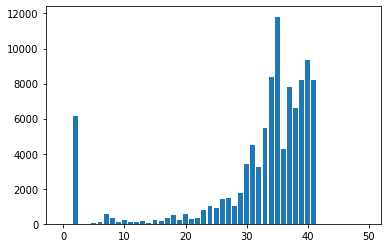

In [54]:
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()